In [26]:
import  pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
numeric = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
boolean = ['Work_accident', 'left', 'promotion_last_5years']
text = ['department', 'salary']

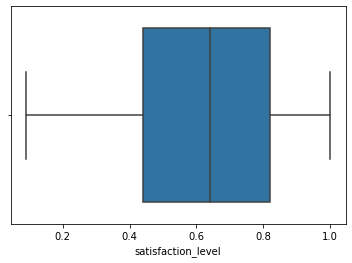

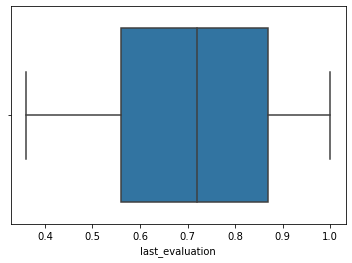

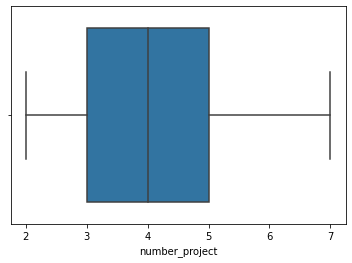

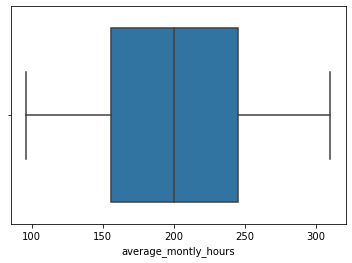

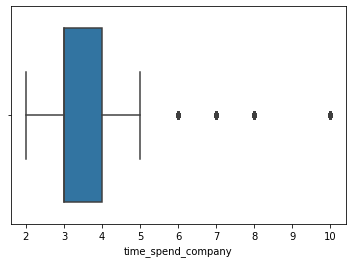

In [5]:
for i in numeric:
    plt.figure()
    sns.boxplot(x=df[i])

In [6]:
for i in boolean + text:
    print(df[i].unique())

[0 1]
[1 0]
[0 1]
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [9]:
statistics_ = pd.DataFrame(columns=df.columns.tolist())
for i in numeric:
    statistics_.loc['mean',i] = df[i].mean()
    statistics_.loc['median',i] = df[i].median()
    statistics_.loc['min,max',i] = df[i].min(), df[i].max()
    statistics_.loc['std',i] = df[i].std()
for i in df:
    statistics_.loc['mode',i] = statistics.mode(df[i])

In [10]:
statistics_

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
mean,0.612834,0.716102,3.80305,201.05,3.49823,NaN,NaN,NaN,NaN,NaN
median,0.64,0.72,4,200,3,NaN,NaN,NaN,NaN,NaN
"min,max","(0.09, 1.0)","(0.36, 1.0)","(2, 7)","(96, 310)","(2, 10)",NaN,NaN,NaN,NaN,NaN
std,0.248631,0.171169,1.23259,49.9431,1.46014,NaN,NaN,NaN,NaN,NaN
mode,0.1,0.55,4,135,3,0,0,0,sales,low


3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [11]:
df_num = df.drop(columns = boolean + text)
df_num.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


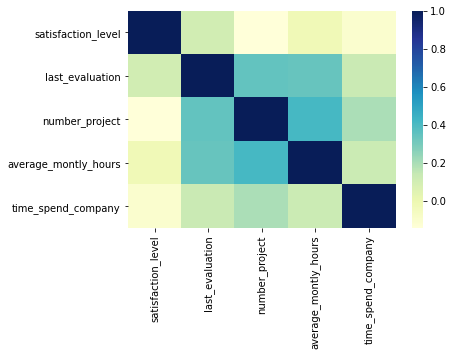

In [12]:
sns.heatmap(df_num.corr(), cmap='YlGnBu')

Самые скоррелированные: number_project, average_montly_hours

Наименее скоррелированные: number_project, satisfaction_level 	

4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [13]:
df.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

5. Показать распределение сотрудников по зарплатам

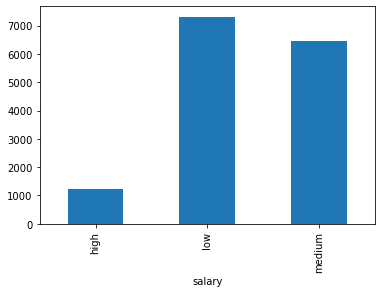

In [14]:
df.groupby('salary').size().plot(kind='bar')

6. Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

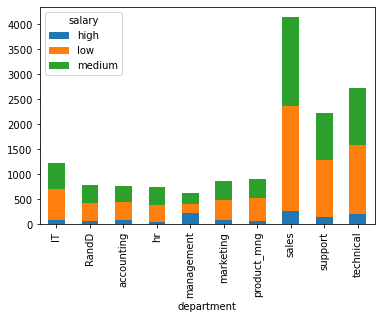

In [17]:
df.groupby(['department', 'salary']).size().unstack().plot(kind='bar', stacked=True)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
dff = df[['average_montly_hours','salary']].drop(df[df.salary == 'medium'].index)

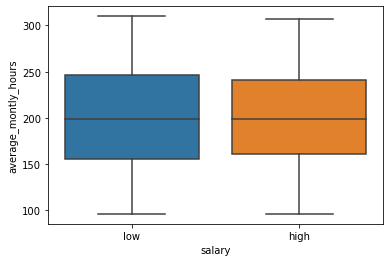

In [16]:
sns.boxplot(x='salary', y='average_montly_hours', data=dff)

Гипотеза опровергнута: из визуализации очевидно, что среднее количество часов, проведенное на работе, у групп примерно одинаково

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников:
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов

In [19]:
all_prom = df.groupby(['left', 'promotion_last_5years']).size().to_frame('size')
all_prom['share'] = all_prom['size'] / len(df)
all_prom = all_prom.drop(index=0, level=1).reset_index(level=1).drop(['promotion_last_5years','size'],axis=1)
all_prom

,share
left,
0,0.020001
1,0.001267


In [20]:
all_sat = df[['left', 'satisfaction_level']].groupby(['left']).mean()
all_sat

,satisfaction_level
left,
0,0.666810
1,0.440098


In [21]:
all_proj = df[['left', 'number_project']].groupby(['left']).mean().round()
all_proj

,number_project
left,
0,4.0
1,4.0


In [22]:
pd.merge(all_prom, all_sat, on='left').merge( all_proj, on='left')

,share,satisfaction_level,number_project
left,,,
0,0.020001,0.666810,4.0
1,0.001267,0.440098,4.0


9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов. Оценить качество модели на тестовой выборки

In [24]:
left = list(df['left'])
data = df.drop(columns=['department','salary'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, left, test_size=0.20)

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
accuracy_score(y_test, lda.predict(X_test))

0.765

10. Загрузить jupyter notebook с решением на github и прислать ссылку